# Problem 2

## Problem Description
In this problem you will train a neural network to classify points with features $x_0$ and $x_1$ belonging to one of three classes, indicated by the label $y$. The structure of your neural network is up to you, but you must describe the structure of your network, training parameters, and report an accuracy for your fitted model on the provided data.

Fill out the notebook as instructed, making the requested plots and printing necessary values. 

*You are welcome to use any of the code provided in the lecture activities.*

#### Summary of deliverables:

- Visualization of provided data
- Visualization of trained model with provided data
- Trained model accuracy
- Discussion of model structure and training parameters

#### Imports and Utility Functions:

In [132]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def dataGen():
    # random_state = 0 set so generated samples are identical
    x, y = datasets.make_blobs(n_samples = 100, n_features = 2, centers = 3, random_state = 0)
    return x, y

def visualizeModel(model):
    # Get data
    x, y = dataGen()
    # Number of data points in meshgrid
    n = 100
    # Set up evaluation grid
    x0 = torch.linspace(min(x[:,0]), max(x[:,0]),n)
    x1 = torch.linspace(min(x[:,1]), max(x[:,1]),n)
    X0, X1 = torch.meshgrid(x0, x1, indexing = 'ij')
    Xgrid = torch.vstack((X0.flatten(),X1.flatten())).T
    Ypred = torch.argmax(model(Xgrid), dim = 1)
    # Plot data
    plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))
    # Plot model
    plt.contourf(Xgrid[:,0].reshape(n,n), Xgrid[:,1].reshape(n,n), Ypred.reshape(n,n), cmap = ListedColormap(['red', 'blue', 'magenta']), alpha = 0.15)
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.show()

## Generate and visualize the data
Use the `dataGen()` function to generate the x and y data, then visualize with a 2D scatter plot, coloring points according to their labels.

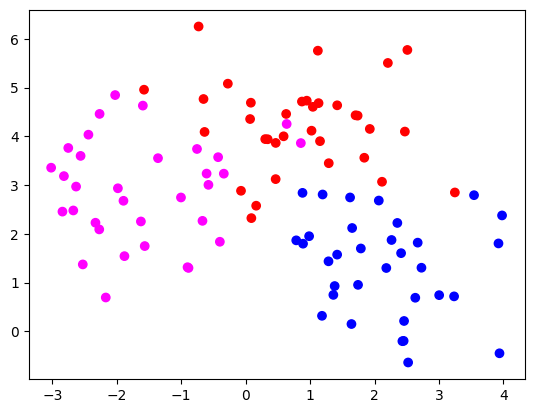

In [133]:
# YOUR CODE GOES HERE
x, y = dataGen()
# print(x,y)

n = 100
plt.scatter(x[:,0], x[:,1], c = y, cmap = ListedColormap(['red','blue','magenta']))

## Create and train a neural network using PyTorch
Choice of structure and training parameters are entirely up to you, however you will need to provide reasoning for your choices. An accuracy of 0.9 or more is reasonable. 

Hint: think about the number out nodes in your output layer and choice of output layer activation function for this multi-class classification problem.

In [134]:
# YOUR CODE GOES HERE
import torch
from torch import nn
import torch.nn.functional as F
from torch import optim, nn
    
class Net_2_layer(nn.Module):
    def __init__(self, N_hidden, N_in=2, N_out=3, activation=F.relu):
        super().__init__()
        # Define layers with correct input and output dimensions
        self.lin1 = nn.Linear(N_in, N_hidden)   # Input layer to first hidden layer
        self.lin2 = nn.Linear(N_hidden, N_hidden) # First hidden layer to second hidden layer
        self.lin3 = nn.Linear(N_hidden, N_out)  # Second hidden layer to output layer
        self.act = activation

    def forward(self, x):
        x = self.lin1(x)
        x = self.act(x)  # Activation of first hidden layer
        x = self.lin2(x)
        x = self.act(x)  # Activation at second hidden layer
        x = self.lin3(x) # (No activation at last layer)
        return x

In [229]:
x = torch.Tensor(x) 
y = torch.Tensor(y)  
y = y.long()


model = Net_2_layer(N_hidden=20, activation=F.softmax)
loss_fcn = nn.CrossEntropyLoss()  

lr = 0.01
epochs = 50

opt = optim.Adam(params=model.parameters(), lr=lr)

for epoch in range(epochs):
    out = model(x)
    loss = loss_fcn(out, y) 
    maxVal, pred = torch.max(out, 1)
    accuracy = ((pred == y).sum().item()) / y.size(0) * 100

    if epoch % int(epochs / 25) == 0:
        print(f"Epoch {epoch}/{epochs}... \tLoss: {loss.item():.4f} \tAccuracy: {accuracy:.2f}%")

 
    opt.zero_grad()       
    loss.backward()       
    opt.step()         


Epoch 0/50... 	Loss: 1.1135 	Accuracy: 33.00%
Epoch 2/50... 	Loss: 1.1067 	Accuracy: 33.00%
Epoch 4/50... 	Loss: 1.1016 	Accuracy: 33.00%
Epoch 6/50... 	Loss: 1.0982 	Accuracy: 33.00%
Epoch 8/50... 	Loss: 1.0961 	Accuracy: 58.00%
Epoch 10/50... 	Loss: 1.0949 	Accuracy: 34.00%
Epoch 12/50... 	Loss: 1.0940 	Accuracy: 34.00%
Epoch 14/50... 	Loss: 1.0930 	Accuracy: 34.00%
Epoch 16/50... 	Loss: 1.0915 	Accuracy: 34.00%
Epoch 18/50... 	Loss: 1.0892 	Accuracy: 57.00%
Epoch 20/50... 	Loss: 1.0863 	Accuracy: 62.00%
Epoch 22/50... 	Loss: 1.0826 	Accuracy: 60.00%
Epoch 24/50... 	Loss: 1.0782 	Accuracy: 60.00%
Epoch 26/50... 	Loss: 1.0731 	Accuracy: 65.00%
Epoch 28/50... 	Loss: 1.0671 	Accuracy: 75.00%
Epoch 30/50... 	Loss: 1.0603 	Accuracy: 81.00%
Epoch 32/50... 	Loss: 1.0526 	Accuracy: 86.00%
Epoch 34/50... 	Loss: 1.0438 	Accuracy: 90.00%
Epoch 36/50... 	Loss: 1.0339 	Accuracy: 91.00%
Epoch 38/50... 	Loss: 1.0229 	Accuracy: 90.00%
Epoch 40/50... 	Loss: 1.0108 	Accuracy: 90.00%
Epoch 42/50... 	Lo

C:\Users\zsqu4\AppData\Local\Temp\ipykernel_37180\3292425923.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(x)  # Activation of first hidden layer
C:\Users\zsqu4\AppData\Local\Temp\ipykernel_37180\3292425923.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(x)  # Activation at second hidden layer


## Visualize your trained model
Use the provided `visualizeModel()` function by passing in your trained model to see your models predicted function compared to the provided data

C:\Users\zsqu4\AppData\Local\Temp\ipykernel_37180\3292425923.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(x)  # Activation of first hidden layer
C:\Users\zsqu4\AppData\Local\Temp\ipykernel_37180\3292425923.py:20: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = self.act(x)  # Activation at second hidden layer


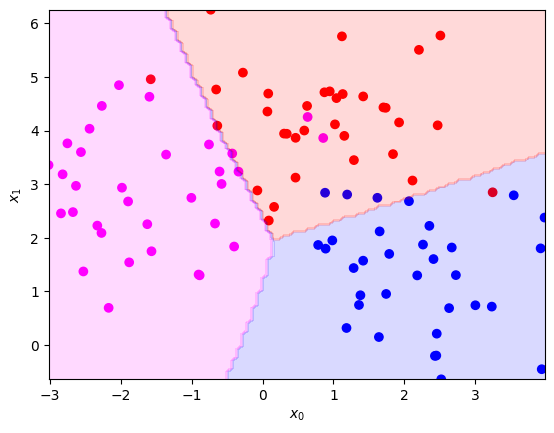

: 

In [230]:
# YOUR CODE GOES HERE
visualizeModel(model)

## Discussion
Report the accuracy of your trained model on the generated data. Discuss the structure of your network, including the number and size of hidden layers, choice of activation function, loss function, optimizer, learning rate, number of training epochs.

*YOUR ANSWER GOES HERE*

The accuracy is around 91%.

The structure of the model is a neural network with 2 hidden layers, with 20 percetrons in each layer. I chose softmax to be the activation function, as as it is generally used for multi-class classification. The loss function I used was CrossEntropyLoss() as it is the most commonly used loss function in multi-class classification. It guides the model towards high probability for the correct class. The optimizer used was Adaptive Moment Estimation for it's fast convergence. 

I chose a learning rate of 0.01 and epoch of 50 for this training. If the learning is too high it will take many more epochs to converge, as well as it is lacking in generalizing the overall pattern of the data. And if it's too low it takes longer to compute. The number of epoch is chosen as such to ensure a good accuracy while not letting the model overfit. 